# 04 Data Transformation

As seen on 02_data_exploration, distribution is skewed, as such, transformers will be applied.\
 \
 \
Importing libraries.

In [1]:
import pandas as pd

 \
 \
Reading file.

In [2]:
data = pd.read_csv('../01_data/clean_data.csv').iloc[:,1:]
x = pd.read_csv('../01_data/x.csv').iloc[:,1:]
x_out = pd.read_csv('../01_data/x_out.csv').iloc[:,1:]
x_if = pd.read_csv('../01_data/x_if.csv').iloc[:,1:]
pd.set_option('display.max_columns', None)
x.head()

,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e
0,2006,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1994,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2006,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1
3,2004,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,2006,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


### Applying PowerTransformer

In [3]:
%%writefile -a functions.py

from sklearn.preprocessing import PowerTransformer

def ptransform_data(df):
    '''function that operates PowerTransformer in x'''

    df_copy = df.copy().astype('float32')
    
    transformer = PowerTransformer()
    transformer.fit(df_copy)
    
    df_tr = transformer.transform(df_copy)
    df_tr = pd.DataFrame(df_tr, columns = df_copy.columns)
    
    return df_tr, transformer

In [4]:
%run functions.py

 \
 \
Applying function and storing datasets.

In [5]:
import pickle

In [6]:
x_tr, transformer = ptransform_data(x)

with open('../03_transformers/powertransformer_x_tr.pkl', 'wb') as file: pickle.dump(transformer, file)
    
#x_tr.to_csv('../01_data/x_tr.csv')

C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [7]:
x_out_tr, transformer = ptransform_data(x_out)

with open('../03_transformers/powertransformer_x_out_tr.pkl', 'wb') as file: pickle.dump(transformer, file)

#x_out_tr.to_csv('../01_data/x_out_tr.csv')

C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [8]:
x_if_tr, transformer = ptransform_data(x_if)

with open('../03_transformers/powertransformer_x_if_tr.pkl', 'wb') as file: pickle.dump(transformer, file)

#x_if_tr.to_csv('../01_data/x_if_tr.csv')

C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


### Applying MinMaxScaler

In [9]:
%%writefile -a functions.py

from sklearn.preprocessing import MinMaxScaler

def mmscale_data(df):
    '''function that operates MinMaxScaler in x'''

    df_copy = df.copy().astype('float32')
    
    scaler = MinMaxScaler()
    scaler.fit(df_copy)
    
    df_sc = scaler.transform(df_copy)
    df_sc = pd.DataFrame(df_sc, columns = df_copy.columns)
    
    return df_sc, scaler

In [10]:
%run functions.py

 \
 \
Applying function and storing datasets.

In [11]:
x_mm, scaler = mmscale_data(x)

with open('../04_scalers/mmscaler_x_mm.pkl', 'wb') as file: pickle.dump(scaler, file)
    
x_mm.to_csv('../01_data/x_mm.csv')

In [12]:
x_tr_mm, scaler = mmscale_data(x_tr)

with open('../04_scalers/mmscaler_x_tr_mm.pkl', 'wb') as file: pickle.dump(scaler, file)

x_tr_mm.to_csv('../01_data/x_tr_mm.csv')

In [13]:
x_out_tr_mm, scaler = mmscale_data(x_out_tr)

with open('../04_scalers/mmscaler_x_out_tr_mm.pkl', 'wb') as file: pickle.dump(scaler, file)

x_out_tr_mm.to_csv('../01_data/x_out_tr_mm.csv')

In [14]:
x_if_tr_mm, scaler = mmscale_data(x_if_tr)

with open('../04_scalers/mmscaler_x_if_tr_mm.pkl', 'wb') as file: pickle.dump(scaler, file)

x_if_tr_mm.to_csv('../01_data/x_if_tr_mm.csv')

 \
 \
Plotting variables.

In [15]:
%run functions.py

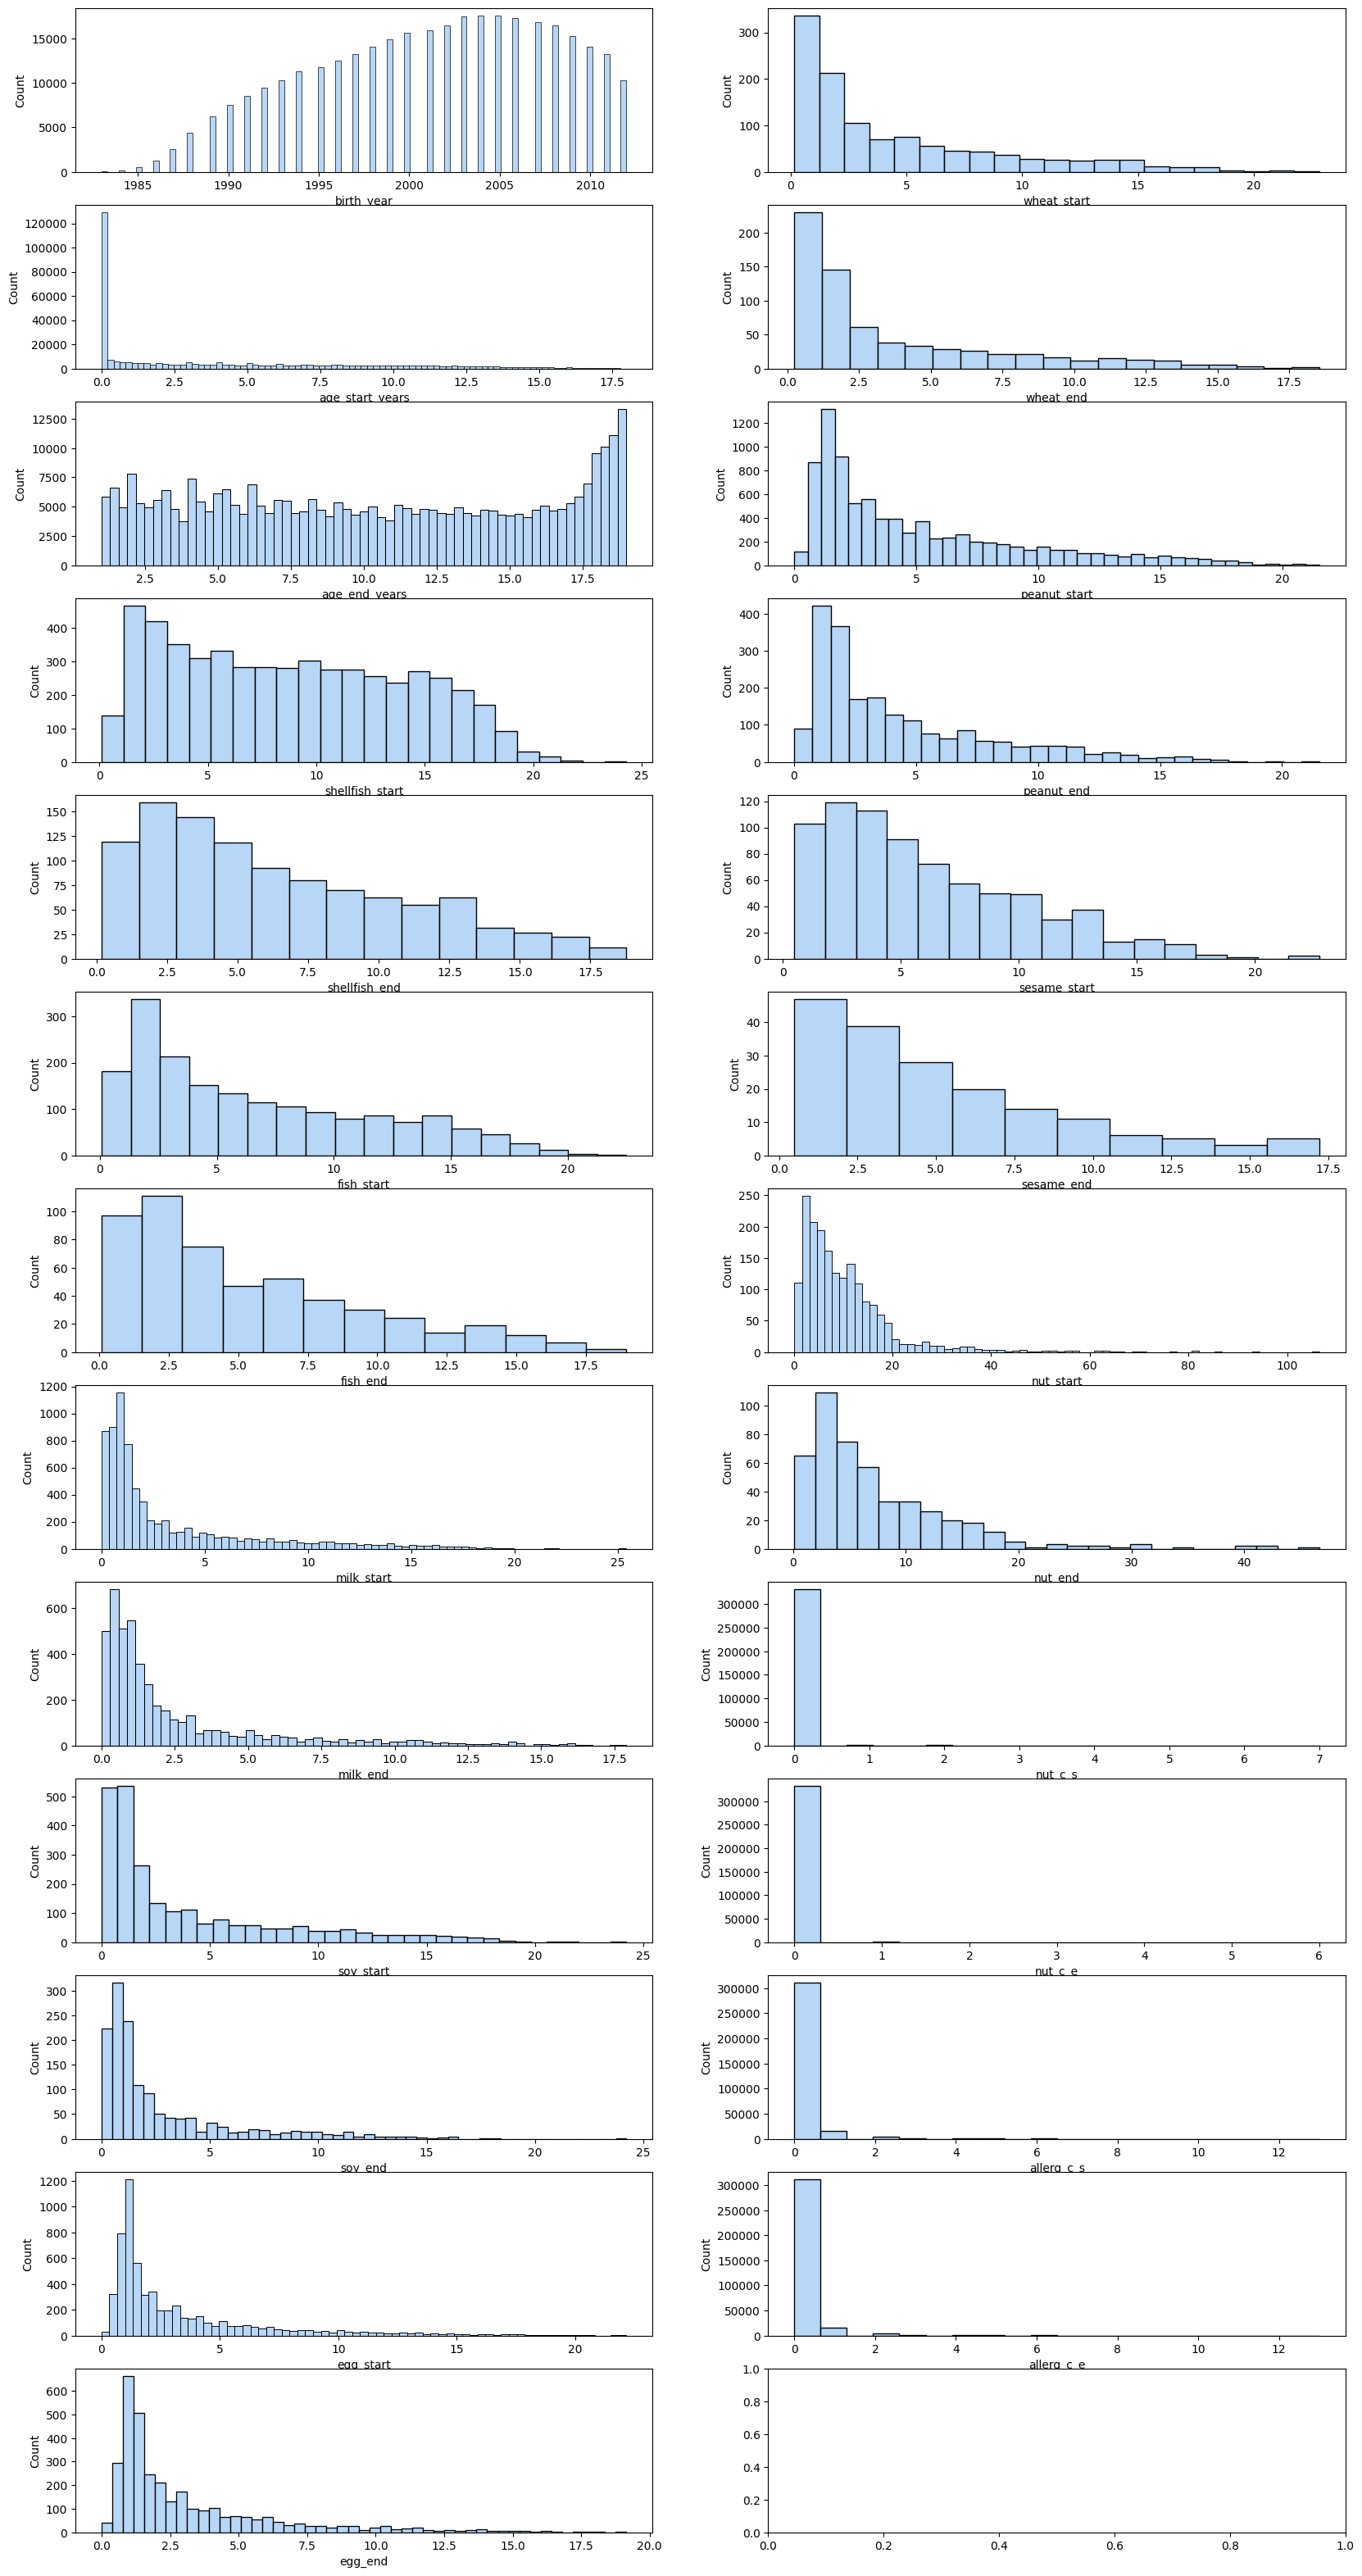

In [16]:
plot_countplot(x, x.columns)

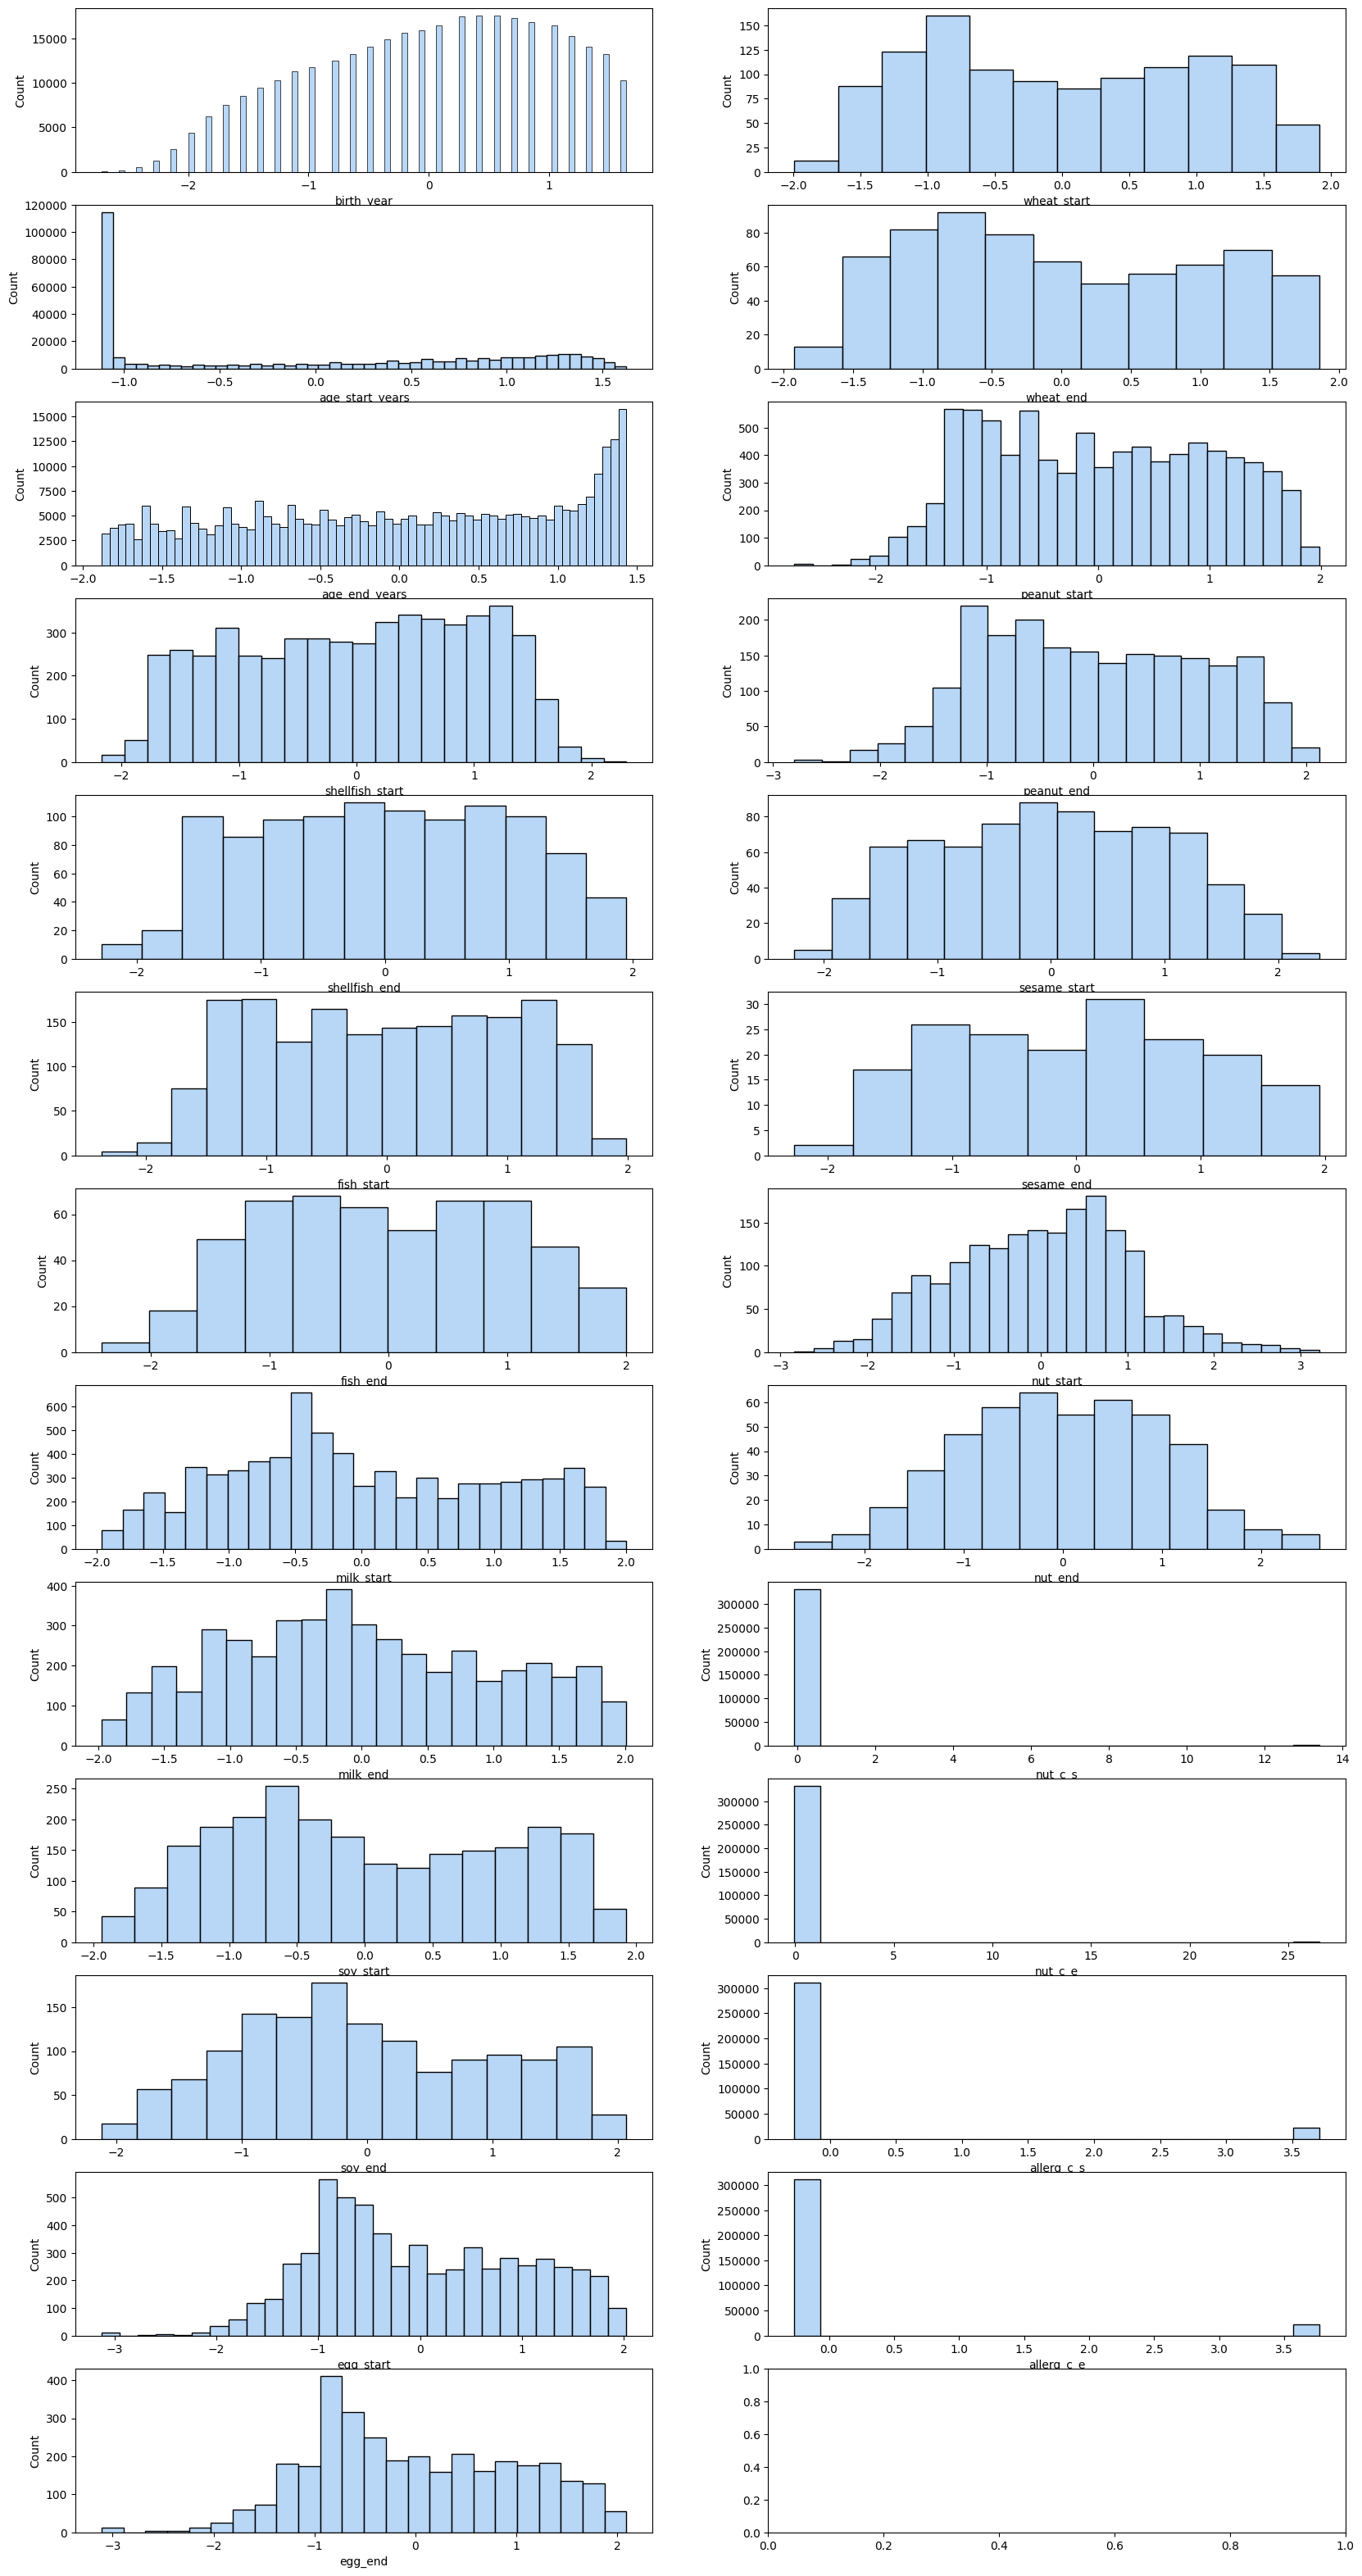

In [17]:
plot_countplot(x_tr, x_tr.columns)

Comments: not a normal distribution in age_start_years, nut and allergies count (start and end) after Transformer.\
 \
 \
Storing y.

In [18]:
y = data.iloc[:,-9:]
y

,atopic_derm_start,atopic_derm_end,allergic_rhinitis_start,allergic_rhinitis_end,asthma_start,asthma_end,first_asthmarx,last_asthmarx,num_asthmarx
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
333170,0.736482,NaN,NaN,NaN,5.426420,7.449692,NaN,NaN,NaN
333171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333172,NaN,NaN,NaN,NaN,2.321697,NaN,2.321697,6.650240,4.0
333173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
y.to_csv('../01_data/y.csv')